# [0] finance-datareader 설치

In [1]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


# [1] 모듈 로드

In [116]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU 
from tensorflow.keras import Sequential
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# [2] 데이터 로드

In [117]:
# 코스피 상장기업 확인

In [118]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68000,2,-900,-1.31,68000,68500,67700,8693875,591399194400,405945213400000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,484500,2,-9000,-1.82,490000,490000,480000,274019,132597362500,113373000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,125100,1,900,0.72,123100,126300,122500,2746577,342505900700,91073095861500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,720000,2,-8000,-1.10,720000,727000,718000,25434,18379700000,51245280000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,54900,2,-800,-1.44,55000,55400,54700,469004,25796227600,45176479830000,822886700,STK


In [119]:
# S&P 종목도 확인 가능

In [120]:
import FinanceDataReader as fdr

# S&P 500 종목 전체
df_spx = fdr.StockListing('S&P500')
df_spx.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [121]:
# TSLA 데이터 가져오기

<Axes: xlabel='Date'>

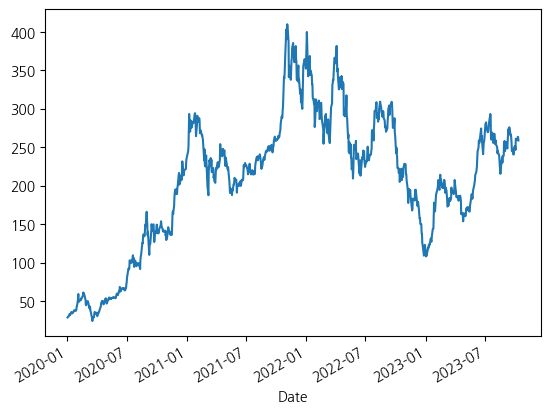

In [122]:
df = fdr.DataReader('TSLA', '2020-01-01')

df['Close'].plot()

In [123]:
# 삼성전자 주가 데이터
#df = fdr.DataReader('005930', '2018-01-01')
#df['Close'].plot()

## [+] 데이터 설명

- Open : 시작가격
- High : 일별 최고가
- Low : 일별 최저가
- Close : 종가
- Adj Close : 수정주가( 발행 주식수의 변화를 반영한 가격 )
- Volume : 거래량

In [124]:
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000
2023-10-09,255.309998,261.359985,252.050003,259.670013,259.670013,101377900
2023-10-10,257.750000,268.940002,257.649994,263.619995,263.619995,122656000


In [125]:
df = df.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,467164500
...,...,...,...,...,...
2023-10-06,253.979996,261.649994,250.649994,260.529999,117947000
2023-10-09,255.309998,261.359985,252.050003,259.670013,101377900
2023-10-10,257.750000,268.940002,257.649994,263.619995,122656000


# [3] 데이터 전처리

## [3-1] NA값 확인

In [126]:
# NA값 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 952 entries, 2020-01-02 to 2023-10-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    952 non-null    float64
 1   High    952 non-null    float64
 2   Low     952 non-null    float64
 3   Close   952 non-null    float64
 4   Volume  952 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.6 KB


In [127]:
# y값은 Close, X값은 5개 칼럼(Open, High, Low, Close, Volume) 모두 사용

In [128]:
y = df['Close']
x = df[['Open', 'High', 'Low', 'Close', 'Volume']]
#x = df.drop(['Close'], axis = 1)

## [3-2] 피처 추가

In [129]:
x['Change'] = x['High'] - x['Low'] # 일별 고가와 저가의 차이  (변동성)
x['variable'] = np.abs( x['Close'] - x['Open'] )  # 시작 가격과 종가의 차이의 절댓값

In [130]:
data = x.copy()

In [131]:
x.shape

(952, 7)

## [3-3] 스케일링

In [132]:
# 전처리 : 스케일링
scaler = StandardScaler()
scaler_df = scaler.fit_transform(x.values.reshape(-1, 7))
#scaler_y = StandardScaler()
#scaler_label = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [133]:
scaler_df

array([[-2.0382884 , -2.04695709, -2.02975306, ...,  0.09945431,
        -1.46305675, -0.9100673 ],
       [-2.02617288, -2.02966011, -2.01795814, ...,  1.46057566,
        -1.37846515, -0.95089506],
       [-2.02619559, -2.03147146, -2.0155697 , ...,  0.19863672,
        -1.43618374, -0.84336182],
       ...,
       [ 0.5678704 ,  0.62806269,  0.64022607, ..., -0.12420265,
         0.21372051,  0.12368401],
       [ 0.66384806,  0.6242767 ,  0.6780303 , ..., -0.33272064,
        -0.34935186, -0.37754705],
       [ 0.62659289,  0.58875476,  0.62836148, ..., -0.24992284,
        -0.17996147, -0.21926271]])

In [134]:
y

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2023-10-06    260.529999
2023-10-09    259.670013
2023-10-10    263.619995
2023-10-11    262.989990
2023-10-12    258.869995
Name: Close, Length: 952, dtype: float64

In [135]:
y = np.array(y)

## [3-4] RNN 활용을 위한 데이터 분할

In [136]:
# 데이터 분할
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i:i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [137]:
x, y = make_dataset(pd.DataFrame(scaler_df), pd.DataFrame(y), window_size = 10)

In [138]:
x.shape, y.shape

((942, 10, 7), (942, 10, 1))

# [4] 모델링

## [4-1] 모델 생성

In [139]:
model = Sequential()

model.add(GRU(50, activation = 'tanh', input_shape = (10,7)))

model.add(Dropout(0.2))

model.add(Dense(units = 32))

model.add(Dropout(0.2))

model.add(Dense(units = 16))

model.add(Dropout(0.2))

model.add(Dense(units = 8))

model.add(Dense(units = 1))

model.compile(loss = 'mse', optimizer = 'adam')

## [4-2] 모델 구조

- GRU와 추가 학습층으로 구성

In [140]:
# 모델 구조
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 50)                8850      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                1632      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                

## [4-3] 학습

In [141]:
model.fit(x, y, epochs = 1000)

Epoch 1/1000
30/30 [==============================] - 2s 6ms/step - loss: 49987.3242
Epoch 2/1000
30/30 [==============================] - 0s 6ms/step - loss: 35649.2305
Epoch 3/1000
30/30 [==============================] - 0s 7ms/step - loss: 8754.3730
Epoch 4/1000
30/30 [==============================] - 0s 6ms/step - loss: 4381.4175
Epoch 5/1000
30/30 [==============================] - 0s 6ms/step - loss: 3055.3159
Epoch 6/1000
30/30 [==============================] - 0s 7ms/step - loss: 2403.8713
Epoch 7/1000
30/30 [==============================] - 0s 6ms/step - loss: 2179.7949
Epoch 8/1000
30/30 [==============================] - 0s 6ms/step - loss: 1871.6665
Epoch 9/1000
30/30 [==============================] - 0s 6ms/step - loss: 1992.0460
Epoch 10/1000
30/30 [==============================] - 0s 6ms/step - loss: 1970.2122
Epoch 11/1000
30/30 [==============================] - 0s 7ms/step - loss: 1779.4723
Epoch 12/1000
30/30 [==============================] - 0s 6ms/step - los

## [4-4] 예측

In [144]:
# 예측값 확인

In [145]:
# 내일 값을 예측해보자

In [146]:
pred = model.predict(scaler.transform(data.tail(10).values).reshape(1,10,7))

1/1 [==============================] - 0s 24ms/step


In [147]:
# 내일 주가 예측
pred 

array([[257.3189]], dtype=float32)

30/30 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'TSLA 실제 가격과 RNN을 활용한 예측치 비교')

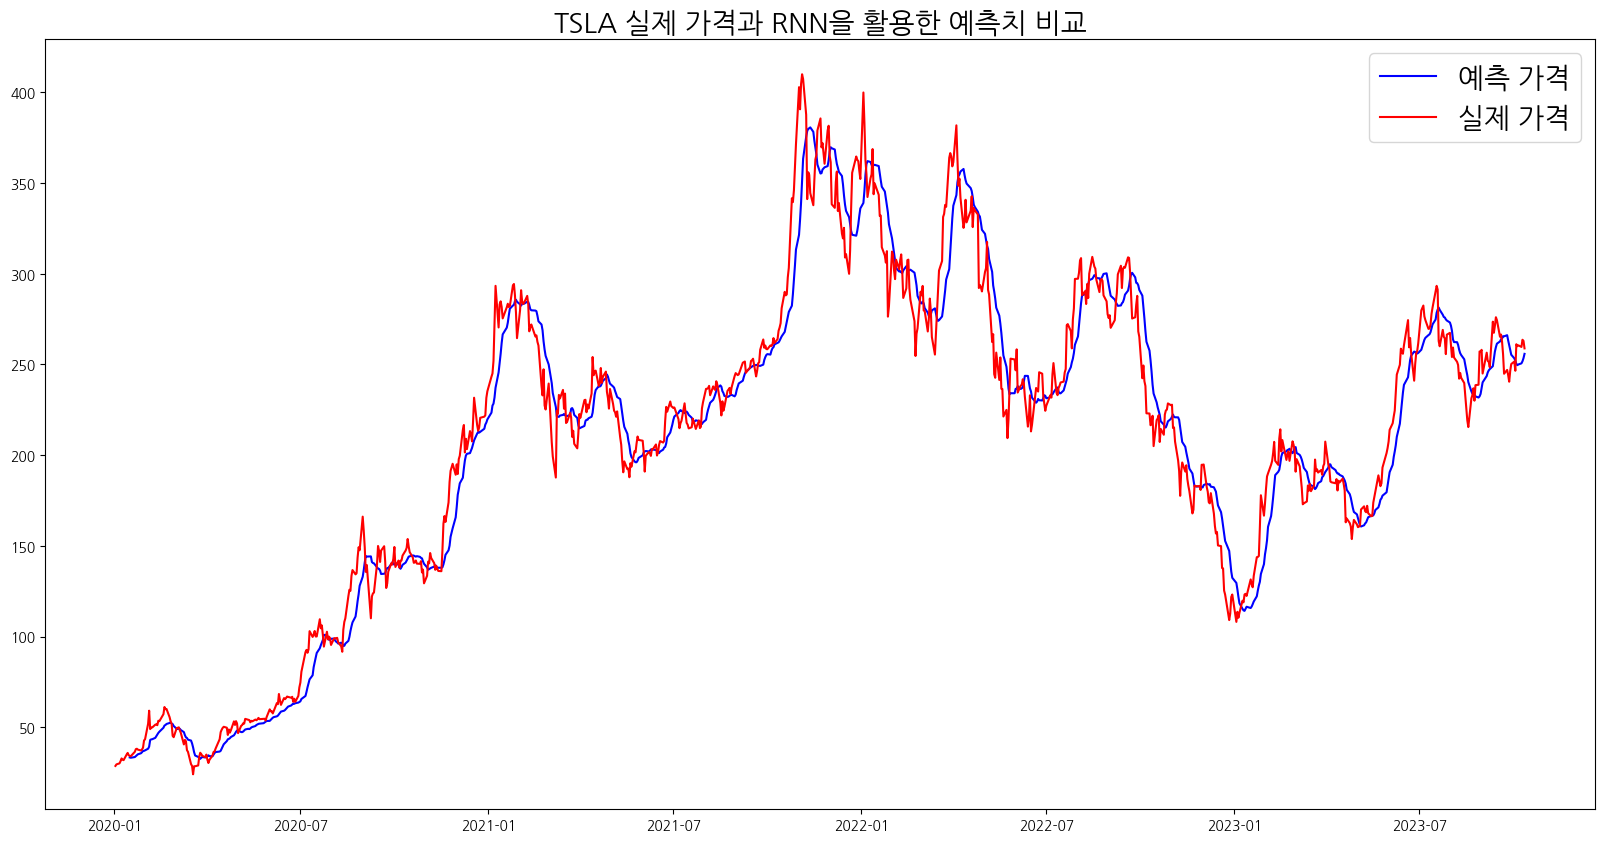

In [148]:
from matplotlib import rc

rc('font', family='NanumGothic')

plt.figure(figsize=(20,10))

plt.plot(pd.DataFrame(model.predict(x), index = df.index[10:]), 'b', label = '예측 가격')
plt.plot(pd.DataFrame(df['Close'], index = df.index), 'r', label = '실제 가격')

plt.legend( fontsize="20")
plt.title('TSLA 실제 가격과 RNN을 활용한 예측치 비교', fontsize = 20)